#  🐕 Dog breed recognition 

|   |   |
|---|---|
| Project  |    [Classez des images à l'aide d'algorithmes de Deep Learning](https://openclassrooms.com/fr/paths/148/projects/634/assignment)         |
| Date   |   March 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) |
| Mentor | Samir Tanfous | 
| Notebook number  | 1 of _                                                    |

**Description:** In this notebook we 

# Imports

In [1]:
import os
from PIL import Image
import pandas as pd
import random
from PIL import Image 

# Exploration of data

In [2]:
images_path = './data/images'

In [3]:
# List of directory names for all breeds
breed_dir_names = os.listdir(path=images_path)
breed_dir_names.sort()

# List of breeds
breed_names = [dir_name.split('-')[1] for dir_name in breed_dir_names]
print(f'Total number of breeds: {len(breed_names)}')
print('Sample of 10 breed names:')
breed_names[:10]

Total number of breeds: 120
Sample of 10 breed names:


['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound']

In [4]:
# Counting the number of images per breed
nb_of_img = {}

for name in breed_dir_names:
    norm_name = name.split('-')[1]

    _, _, filenames = next(os.walk(f'{images_path}/{name}'))
    nb_files = len(filenames)

    nb_of_img[norm_name] = nb_files

# Dataframe for this count, sorted
imgs_per_breed = pd.DataFrame({'Breed' : list(nb_of_img.keys()),
                               'Nb_imgs' : list(nb_of_img.values())} )
imgs_per_breed = imgs_per_breed.sort_values(by='Nb_imgs',ascending=False).reset_index(drop=True)
imgs_per_breed.head()


,Breed,Nb_imgs
0,Maltese_dog,252
1,Afghan_hound,239
2,Scottish_deerhound,232
3,Pomeranian,219
4,Bernese_mountain_dog,218


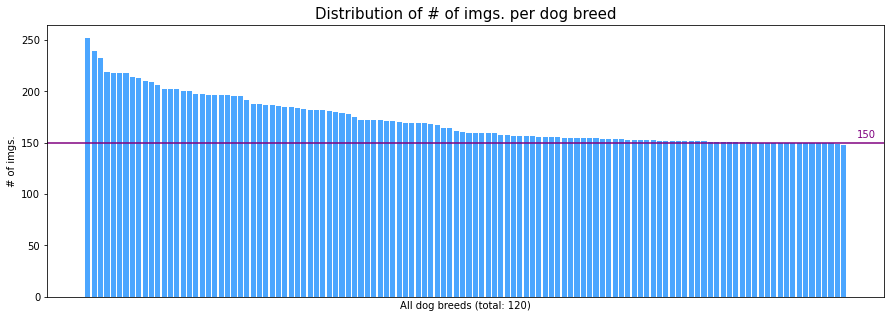

In [8]:
import matplotlib.pyplot as plt

# Plotting the distribution of nb. of images per breed
fig = plt.figure(figsize=(15,5))

plt.bar(x=imgs_per_breed.index,
        height=imgs_per_breed.Nb_imgs,
        color='dodgerblue',
        alpha= 0.8)
plt.axhline(y=150, linewidth=1.5, color='purple')
plt.text(x=121, y= 155, s='150', c='purple' )
plt.title('Distribution of # of imgs. per dog breed', size=15)
plt.xlabel('All dog breeds (total: 120)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
    )
plt.ylabel('# of imgs.')

plt.show()

## Displaying some images

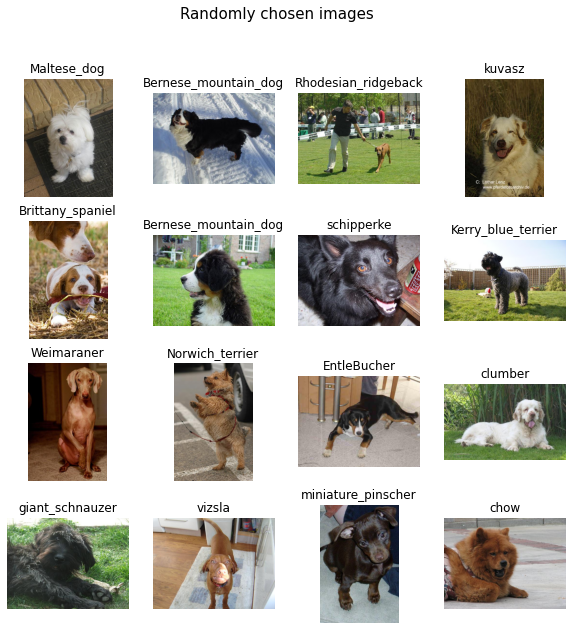

In [48]:
fig = plt.figure(figsize=(10,10))

# Pick randomly 16 breeds
for idx,breed_dir in enumerate(random.choices(breed_dir_names, k=16)):
    # Pick random image
    _,_,filenames = next(os.walk('data/images/' + breed_dir))
    img_name = random.choice(filenames)
    dog_img = Image.open('data/images/'+breed_dir+'/'+img_name)
    # Dislay img on axis
    ax = fig.add_subplot(4,4,idx+1)
    plt.imshow(dog_img)
    
    ax.set_title(breed_dir.split('-')[1])
    plt.axis('off')

plt.suptitle('Randomly chosen images', size=15)
plt.show()
